# __Who Own's O'ahu?__
## Who are the largest land owners in Hawaii? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hon_zone_df_int = pd.read_csv("/Users/micahswain/Desktop/Working/Zoning_-_Land_Use_Ordinance.csv")

hon_zone_df_int.columns = hon_zone_df_int.columns.str.lower()

print(hon_zone_df_int.shape)
hon_zone_df_int.head()



(1936, 7)


,objectid,zone_class,zoning_description,zoning_label,loaddate,shape__area,shape__length
0,1,A-1,A-1 Low-density Apartment District,A-1,2020/07/01 00:00:00+00,4.026643e+04,1008.759796
1,2,A-1,A-1 Low-density Apartment District,A-1,2020/07/01 00:00:00+00,6.895549e+03,373.128219
2,3,A-1,A-1 Low-density Apartment District,A-1,2020/07/01 00:00:00+00,5.759434e+05,2823.975439
3,4,A-1,A-1 Low-density Apartment District,A-1,2020/07/01 00:00:00+00,1.386162e+06,5732.950375
4,5,A-1,A-1 Low-density Apartment District,A-1,2020/07/01 00:00:00+00,4.519375e+04,852.056306


In [3]:
hon_zone_df = hon_zone_df_int.drop(columns = ['loaddate'])

In [4]:
hon_zone_df.describe(include='all')

,objectid,zone_class,zoning_description,zoning_label,shape__area,shape__length
count,1936.00000,1936,1936,1936,1.935000e+03,1.935000e+03
unique,NaN,35,35,35,NaN,NaN
top,NaN,P-2,P-2 General Preservation District,P-2,NaN,NaN
freq,NaN,525,525,525,NaN,NaN
mean,968.50000,NaN,NaN,NaN,8.633006e+06,9.921635e+03
std,559.01938,NaN,NaN,NaN,1.319690e+08,4.560186e+04
min,1.00000,NaN,NaN,NaN,5.221558e-02,4.762081e+00
25%,484.75000,NaN,NaN,NaN,8.735665e+04,1.441548e+03
50%,968.50000,NaN,NaN,NaN,3.465608e+05,2.960796e+03
75%,1452.25000,NaN,NaN,NaN,1.610797e+06,7.466348e+03


In [5]:
# I added up the shape area and coverted to square miles. 
# the output matched my wikipedia search for Oahu square area.

hon_zone_df['shape__area'].sum()/43560/640

599.2046358584741

In [6]:
hon_zone_df['area_acres'] = hon_zone_df['shape__area']/43560

hon_zone_df

,objectid,zone_class,zoning_description,zoning_label,shape__area,shape__length,area_acres
0,1,A-1,A-1 Low-density Apartment District,A-1,4.026643e+04,1008.759796,0.924390
1,2,A-1,A-1 Low-density Apartment District,A-1,6.895549e+03,373.128219,0.158300
2,3,A-1,A-1 Low-density Apartment District,A-1,5.759434e+05,2823.975439,13.221841
3,4,A-1,A-1 Low-density Apartment District,A-1,1.386162e+06,5732.950375,31.821890
4,5,A-1,A-1 Low-density Apartment District,A-1,4.519375e+04,852.056306,1.037506
...,...,...,...,...,...,...,...
1931,1932,Resort,Resort District,RESORT,2.571961e+05,2124.526708,5.904410
1932,1933,Resort,Resort District,RESORT,9.066480e+05,5844.301208,20.813775
1933,1934,Resort,Resort District,RESORT,6.797568e+06,23700.499396,156.050695
1934,1935,Resort,Resort District,RESORT,4.178383e+06,15455.656248,95.922467


In [7]:
zone_acres = hon_zone_df.groupby(['zoning_label','zoning_description'], as_index=False)['area_acres'].sum()

zone_acres = pd.DataFrame(zone_acres).sort_values('area_acres', ascending=False).head(25)

zone_acres['zone_group'] = ['Preservation', 'Agricultural', 'Agricultural', 'Military and Federal', 'Residential', 'Preservation', 'Residential', 'Industrial',
                           'Residential', 'Apartments', 'Agricultural', 'Apartments', 'Business', 'Residential', 'Business', 'Industrial', 'Industrial', 'Other',
                           'Residential', 'Resort', 'Apartments', 'Business', 'Other', 'Industrial', 'Other']

zone_acres['area_acres'] = zone_acres['area_acres'].round(decimals=0)

zone_acres.head()

,zoning_label,zoning_description,area_acres,zone_group
23,P-1,P-1 Restricted Preservation District,157475.0,Preservation
3,AG-1,AG-1 Restricted Agriculture District,63458.0,Agricultural
4,AG-2,AG-2 General Agriculture District,41834.0,Agricultural
16,F-1,F-1 Federal and Military Preservation District,38574.0,Military and Federal
30,R-5,R-5 Residential District,26875.0,Residential


In [8]:
zone_group = zone_acres.groupby(['zone_group'], as_index=False)['area_acres'].sum()

zone_group

,zone_group,area_acres
0,Agricultural,108546.0
1,Apartments,6729.0
2,Business,3892.0
3,Industrial,8443.0
4,Military and Federal,38574.0
5,Other,1085.0
6,Preservation,174610.0
7,Residential,40505.0
8,Resort,514.0


In [9]:
zone_group = zone_group.sort_values('area_acres', ascending=False).head(25)

print(zone_group['area_acres'].sum())

zone_group

382898.0


,zone_group,area_acres
6,Preservation,174610.0
0,Agricultural,108546.0
7,Residential,40505.0
4,Military and Federal,38574.0
3,Industrial,8443.0
1,Apartments,6729.0
2,Business,3892.0
5,Other,1085.0
8,Resort,514.0


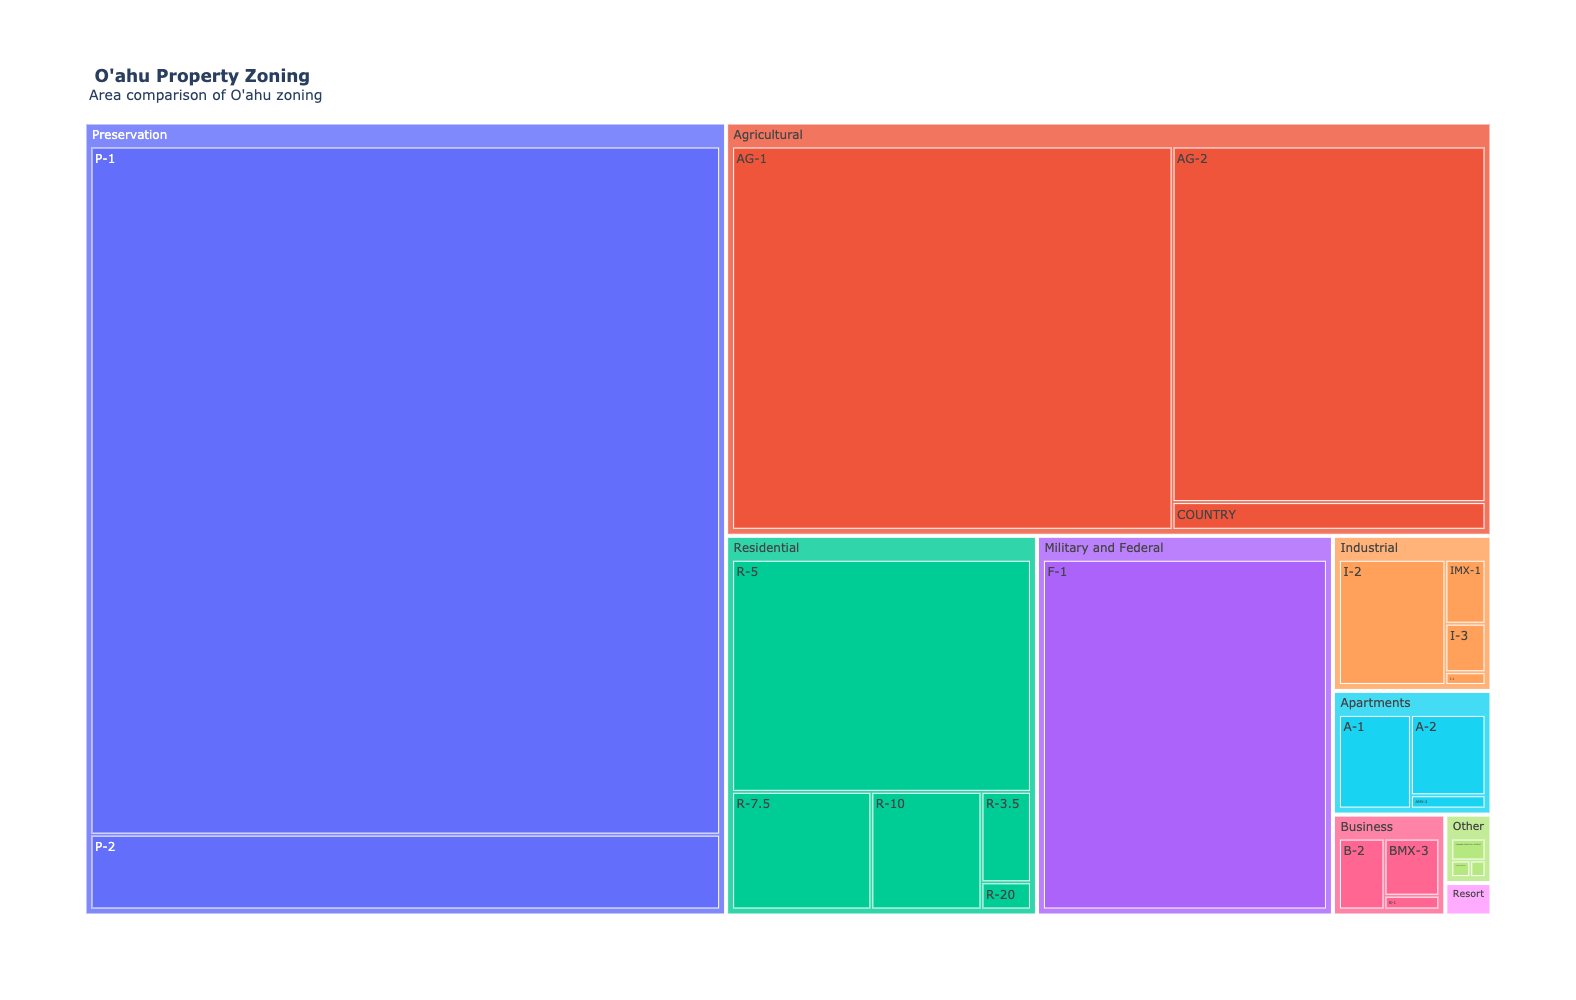

In [243]:
import plotly.express as px
fig = px.treemap(zone_acres, 
                 path=['zone_group', 'zoning_label'], 
                 values='area_acres',
                 color_discrete_sequence=['#D60000', '#FFD500', '#007C35', '#026ECE', 
                                          '#D60000', '#FFD500', '#007C35', '#026ECE', '#D60000'])
                


fig.layout=go.Layout(
        annotations=[
            go.layout.Annotation(
                text="Area comparison of O'ahu zoning",
                showarrow=False,
                x=0.005,
                y=1.02,
                font=dict(
                size=14))]
)

fig.update_layout(title_text ="<b>O'ahu Property Zoning</b>", 
                  title_x=0.06, title_y=.93,
                  width=1500,
                  height=1000
                 )
    
fig.show()

In [11]:
#import parcel owner information for city and county of Honolulu

hon_ownertype_int = pd.read_csv('/Users/micahswain/Desktop/Working/Unit 1 Build Week/OWNERDAT_-_Table.csv', low_memory=False)

print(hon_ownertype_int.shape)
hon_ownertype_int.head()

(312608, 30)


,PARID,TMK,SUFFIX,SEQ,TAXYR,TAXBILLOWNER,OWNTYPE1,PCTOWNER,TAXBILLADDRESS,TAXBILLCITY,...,ADDRUNIT,UNITDESC,ADDRDIR,ADDRSTREET,ADDRTYPE,CLTADDRTYPE,OWNTYPE4,OWNNUM,TITLEDESC,OBJECTID
0,360140040000,36014004,0,0,2021,"YOUNG,ROYDEN S H",1A,100.0,NaN,HONOLULU,...,NaN,NaN,NaN,KEAKEALANI,ST,S,NaN,NaN,NaN,1
1,360140050000,36014005,0,0,2021,"CHIN,YVONNE L P TR",1A,NaN,5255 KEAKEALANI ST,HONOLULU,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,2
2,360140060000,36014006,0,0,2021,HAWAIIAN ELECTRIC CO INC,1A,100.0,NaN,HONOLULU,...,2750,PO BOX,NaN,NaN,NaN,S,NaN,4000.0,NaN,3
3,330610860000,33061086,0,0,2021,SVW TRUST,1A,100.0,NaN,BEVERLY HILLS,...,683,APT,N,ROBERTSON,BLVD,S,NaN,NaN,NaN,4
4,230100281031,23010028,1031,0,2021,KC RAINBOW DEV CO LLC,1A,NaN,NaN,CUPERTINO,...,200,STE,NaN,STEVENS CREEK,BLVD,S,NaN,NaN,NaN,5


In [12]:
#remove unneeded columns

hon_ownertype = hon_ownertype_int.drop(columns = ['TMK', 'SUFFIX', 'SEQ', 'PCTOWNER', 'TAXYR', 'OWNTYPE1', 'TAXBILLADDRESS',
                                                 'GRPFLAG', 'MARSTAT', 'OWNTYPE3', 'ADDRNUM', 'ADDRSTREET',
                                                 'ADDRTYPE', 'CLTADDRTYPE', 'OWNTYPE4', 'OWNNUM', 'TITLEDESC', 
                                                 'OBJECTID', 'ADDRESS1', 'ADDRESS3', 'ADDRUNIT', 'UNITDESC', 'ADDRDIR'])

hon_ownertype.head()

,PARID,TAXBILLOWNER,TAXBILLCITY,TAXBILLSTATE,TAXBILLCOUNTRY,TAXBILLZIP5,TAXBILLZIP4
0,360140040000,"YOUNG,ROYDEN S H",HONOLULU,HI,NaN,96821.0,NaN
1,360140050000,"CHIN,YVONNE L P TR",HONOLULU,HI,NaN,96821.0,NaN
2,360140060000,HAWAIIAN ELECTRIC CO INC,HONOLULU,HI,NaN,96840.0,NaN
3,330610860000,SVW TRUST,BEVERLY HILLS,CA,NaN,90210.0,NaN
4,230100281031,KC RAINBOW DEV CO LLC,CUPERTINO,CA,NaN,95014.0,NaN


In [13]:
#import information about parcel value for Honolulu

hon_parcel_value_int = pd.read_csv('/Users/micahswain/Desktop/Working/Unit 1 Build Week/ASMTPITT_-_Table.csv')

print(hon_parcel_value_int.shape)
hon_parcel_value_int.head()

(311307, 15)


,PARID,TMK,SUFFIX,SEQ,TAXYR,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TAXRATECODE,TNETTAXVAL,OVRCLASS,PITTSQFT,PITTACRE,OBJECTID
0,840260670000,84026067,0,6,2020,92200,0,259300,0,NaN,351500,NaN,NaN,NaN,1
1,840261280000,84026128,0,6,2020,86100,86100,244300,13900,NaN,230400,NaN,NaN,NaN,2
2,840261290000,84026129,0,6,2020,76800,76800,244300,63200,NaN,181100,NaN,NaN,NaN,3
3,840261300000,84026130,0,6,2020,114200,114200,312500,25800,NaN,286700,NaN,NaN,NaN,4
4,840270010000,84027001,0,6,2020,128600,0,274200,0,NaN,402800,NaN,NaN,NaN,5


In [14]:
#drop unneeded columns. 

hon_parcel_value = hon_parcel_value_int.drop(columns = ['TMK', 'SUFFIX', 'SEQ', 'TAXYR', 'TAXRATECODE', 'OVRCLASS',
                                             'PITTSQFT', 'PITTACRE', 'OBJECTID'])

hon_parcel_value

,PARID,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TNETTAXVAL
0,840260670000,92200,0,259300,0,351500
1,840261280000,86100,86100,244300,13900,230400
2,840261290000,76800,76800,244300,63200,181100
3,840261300000,114200,114200,312500,25800,286700
4,840270010000,128600,0,274200,0,402800
...,...,...,...,...,...,...
311302,220240200000,0,0,100,100,0
311303,220240210000,450200,140000,1658300,0,1968500
311304,220240160000,171100,0,767300,0,938400
311305,220250410000,75900,0,736300,0,812200


In [15]:
#import info about parcel size for the city of honolulu

hon_parcel_size_int = pd.read_csv('/Users/micahswain/Desktop/Working/Unit 1 Build Week/LEGDAT_-_Table.csv')

print(hon_parcel_size_int.shape)
hon_parcel_size_int.head()

(312608, 13)


,PARID,TMK,SUFFIX,SEQ,TAXYR,UNITNO,TOTACRES,TOTSQFT,LEGAL1,LEGAL2,LEGAL3,OBJECTID,ESRI_OID
0,970440810000,97044081,0,0,2021,0,0.0,6000,"LOT 81 BLK B 6,000 SF MAP 32 LCAPP 1695",NaN,NaN,260514,1
1,950490220009,95049022,9,0,2021,93,0.0,0,"APT 93 ""KUMELEWAI GARDENS"" CONDO MAP 954",TOG/STORAGE AREA S-93 & PKG STALL SHOWN ON DECL,NaN,260515,2
2,470540150000,47054015,0,0,2021,0,0.0,6700,"LOT 222 6,700 SF MAP 1 LCCON 105",TOG/R-O-W OVER & ACROSS LOTS A TO H & J TO L M...,NaN,260516,3
3,470540160000,47054016,0,0,2021,0,0.0,6075,"LOT 221 6,075 SF MAP 1 LC CON 105",TOG/R-O-W APPURTENANT TO LOT 221 OVER & ACROSS...,,260517,4
4,470540170000,47054017,0,0,2021,0,0.0,6406,"LOT 220 MAP 1 6,406 SF LCCON 105",NaN,NaN,260518,5


In [16]:
#drop unneeded columns. 

hon_parcel_size = hon_parcel_size_int.drop(columns = ['TMK', 'SUFFIX', 'SEQ', 'TAXYR', 'OBJECTID', 'ESRI_OID',
                                                      'LEGAL1', 'LEGAL2', 'LEGAL3'])

hon_parcel_size.head()

,PARID,UNITNO,TOTACRES,TOTSQFT
0,970440810000,0,0.0,6000
1,950490220009,93,0.0,0
2,470540150000,0,0.0,6700
3,470540160000,0,0.0,6075
4,470540170000,0,0.0,6406


In [17]:
#merge datasets. 

merged = pd.merge(hon_ownertype, hon_parcel_value, on='PARID')

print(merged.shape)
merged.head()

(311138, 12)


,PARID,TAXBILLOWNER,TAXBILLCITY,TAXBILLSTATE,TAXBILLCOUNTRY,TAXBILLZIP5,TAXBILLZIP4,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TNETTAXVAL
0,360140040000,"YOUNG,ROYDEN S H",HONOLULU,HI,NaN,96821.0,NaN,35100,35100,862900,64900,798000
1,360140050000,"CHIN,YVONNE L P TR",HONOLULU,HI,NaN,96821.0,NaN,81200,81200,863000,58800,804200
2,360140060000,HAWAIIAN ELECTRIC CO INC,HONOLULU,HI,NaN,96840.0,NaN,0,0,100,100,0
3,330610860000,SVW TRUST,BEVERLY HILLS,CA,NaN,90210.0,NaN,245500,0,1030900,0,1276400
4,230100281031,KC RAINBOW DEV CO LLC,CUPERTINO,CA,NaN,95014.0,NaN,25000,0,1000,0,26000


In [18]:
#merge datasets

hon_parcel = pd.merge(merged, hon_parcel_size, on='PARID')

print(hon_parcel.shape)

#check sum of parcel size to see if it roughly adds up to the area of Oahu.

print(hon_parcel['TOTACRES'].sum()/640)
hon_parcel.head()

(311138, 15)
528.2049898437501


,PARID,TAXBILLOWNER,TAXBILLCITY,TAXBILLSTATE,TAXBILLCOUNTRY,TAXBILLZIP5,TAXBILLZIP4,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TNETTAXVAL,UNITNO,TOTACRES,TOTSQFT
0,360140040000,"YOUNG,ROYDEN S H",HONOLULU,HI,NaN,96821.0,NaN,35100,35100,862900,64900,798000,0,0.0,7506
1,360140050000,"CHIN,YVONNE L P TR",HONOLULU,HI,NaN,96821.0,NaN,81200,81200,863000,58800,804200,0,0.0,7508
2,360140060000,HAWAIIAN ELECTRIC CO INC,HONOLULU,HI,NaN,96840.0,NaN,0,0,100,100,0,0,0.0,36
3,330610860000,SVW TRUST,BEVERLY HILLS,CA,NaN,90210.0,NaN,245500,0,1030900,0,1276400,0,0.0,6693
4,230100281031,KC RAINBOW DEV CO LLC,CUPERTINO,CA,NaN,95014.0,NaN,25000,0,1000,0,26000,PA-3001,0.0,0


In [19]:
#created a new column tot_area_acre, pulling values from TOTACRES or TOTSQFT

hon_parcel['tot_area_acres'] = np.where(hon_parcel['TOTACRES'] != 0.0, hon_parcel['TOTACRES'], hon_parcel['TOTSQFT']/43560 )

hon_parcel.head()

,PARID,TAXBILLOWNER,TAXBILLCITY,TAXBILLSTATE,TAXBILLCOUNTRY,TAXBILLZIP5,TAXBILLZIP4,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TNETTAXVAL,UNITNO,TOTACRES,TOTSQFT,tot_area_acres
0,360140040000,"YOUNG,ROYDEN S H",HONOLULU,HI,NaN,96821.0,NaN,35100,35100,862900,64900,798000,0,0.0,7506,0.172314
1,360140050000,"CHIN,YVONNE L P TR",HONOLULU,HI,NaN,96821.0,NaN,81200,81200,863000,58800,804200,0,0.0,7508,0.172360
2,360140060000,HAWAIIAN ELECTRIC CO INC,HONOLULU,HI,NaN,96840.0,NaN,0,0,100,100,0,0,0.0,36,0.000826
3,330610860000,SVW TRUST,BEVERLY HILLS,CA,NaN,90210.0,NaN,245500,0,1030900,0,1276400,0,0.0,6693,0.153650
4,230100281031,KC RAINBOW DEV CO LLC,CUPERTINO,CA,NaN,95014.0,NaN,25000,0,1000,0,26000,PA-3001,0.0,0,0.000000


In [20]:
#check tot area, pretty close to area of oahu

hon_parcel['tot_area_acres'].sum()/640

582.2289823253847

In [21]:
# curious as to who owns the most land on Oahu


tot_area_by_owner = hon_parcel.groupby(['TAXBILLOWNER'], as_index=False)['tot_area_acres'].sum()

tot_area_by_owner = pd.DataFrame(tot_area_by_owner).sort_values('tot_area_acres', ascending=False)

tot_area_by_owner.head()

,TAXBILLOWNER,tot_area_acres
192769,STATE OF HAWAII,68086.633178
212593,UNITED STATES OF AMERICA,56788.672377
14479,B P BISHOP TRUST ESTATE,47938.977634
38495,CITY AND COUNTY OF HONOLULU,13850.639982
177157,S OF H DLNR,11776.936691


__No surprise there the largest land owner is the State of Hawaii, followed by the federal government, but I think a better question is what percent of the land do they own.__

In [22]:
# percent of land owned

tot_area_by_owner['area%'] = tot_area_by_owner['tot_area_acres']/tot_area_by_owner['tot_area_acres'].sum()*100

top_25_owners_area = tot_area_by_owner.head(25)

remaining_owners = pd.DataFrame([['REMAINING HAWAII LAND OWNERS', 
                                  (tot_area_by_owner['tot_area_acres'].sum() - top_25_owners_area['tot_area_acres'].sum()),
                                 (100 - top_25_owners_area['area%'].sum())]], columns=['TAXBILLOWNER', 'tot_area_acres', 'area%'])

top_25_owners_area = top_25_owners_area.reset_index(drop=True).append(remaining_owners, ignore_index=True).sort_index(ascending=False)

top_25_owners_area['tot_area_acres'] = top_25_owners_area['tot_area_acres'].round()

top_25_owners_area

,TAXBILLOWNER,tot_area_acres,area%
25,REMAINING HAWAII LAND OWNERS,105771.0,28.385312
24,HI'IPAKA LLC,1803.0,0.483774
23,KUALOA RANCH INC,1835.0,0.492434
22,MAKAIWA HILLS LLC,1857.0,0.498244
21,UNIVERSITY OF HAWAII,1872.0,0.502414
20,QUEEN EMMA LAND CO,2075.0,0.556941
19,KAUKONAHUA RANCH LLC,2121.0,0.569291
18,CASTLE & COOKE HOMES HAWAII INC,2140.0,0.574190
17,MONSANTO COMPANY,2151.0,0.577157
16,"STACK,ALLEN M JR",2195.0,0.588992


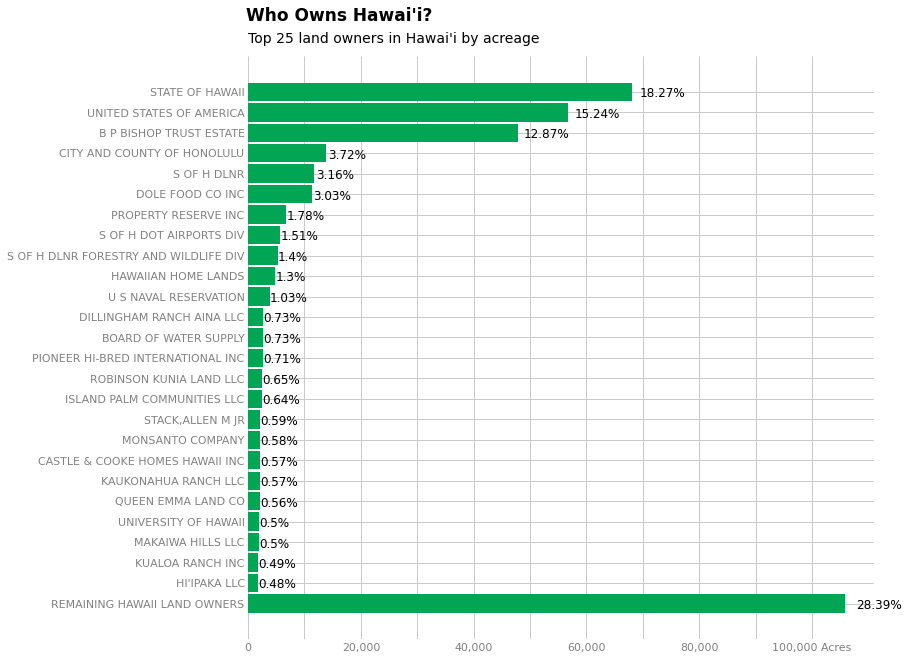

In [23]:
plt.style.use('fivethirtyeight')

x = top_25_owners_area['TAXBILLOWNER']
h = top_25_owners_area['tot_area_acres'].astype(int)
p = top_25_owners_area['area%'].round(decimals=2)

fig, ax = plt.subplots()

# figure styles
fig.set_facecolor('white')
fig.set_figheight(10)
fig.set_figwidth(10)

# axes styles
ax.barh(y=x, width=h, height=.9, color='#02A553')
ax.set_facecolor('white')

# title and subtitle
ax.set_title(x=.145, y=1.05, label="Who Owns Hawai'i?", fontsize=17, fontweight='bold')
# x and y position is relative to the axis labels
ax.text(x=-1, y=27.4, s="Top 25 land owners in Hawai'i by acreage")

# tick marks (positions)
ax.set_xticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])
ax.set_yticks(x)
#ax.tick_params()

# tick labels (numbers)
ax.set_yticklabels(x, fontsize=11, color='grey')
ax.set_xticklabels([0,'','20,000','','40,000','','60,000','','80,000','',"100,000 Acres"],fontsize=11, color='grey')

# axis labels
#ax.set_xlabel('ACRES', fontsize=11, fontweight='bold')
#ax.set_ylabel('OWNERS', fontsize=11, fontweight='bold')


# control the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

x=34

for val in p:
  x = x-1
  ax.annotate(text=str(val)+'%', xy=(val*3800, 32.75-x), fontsize=12)

plt.show()

__So we now know who own's the most land, but I bet things will change when see who own's the most land value, because although Dole own's a lot of land it mostly agricultural land so that doesn't hold a lot of value.__

In [24]:
# created new column net value without exemptions

hon_parcel['net_value'] = hon_parcel['BUILDINGVALUE'] + hon_parcel['LANDVALUE']

hon_parcel.head()

,PARID,TAXBILLOWNER,TAXBILLCITY,TAXBILLSTATE,TAXBILLCOUNTRY,TAXBILLZIP5,TAXBILLZIP4,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TNETTAXVAL,UNITNO,TOTACRES,TOTSQFT,tot_area_acres,net_value
0,360140040000,"YOUNG,ROYDEN S H",HONOLULU,HI,NaN,96821.0,NaN,35100,35100,862900,64900,798000,0,0.0,7506,0.172314,898000
1,360140050000,"CHIN,YVONNE L P TR",HONOLULU,HI,NaN,96821.0,NaN,81200,81200,863000,58800,804200,0,0.0,7508,0.172360,944200
2,360140060000,HAWAIIAN ELECTRIC CO INC,HONOLULU,HI,NaN,96840.0,NaN,0,0,100,100,0,0,0.0,36,0.000826,100
3,330610860000,SVW TRUST,BEVERLY HILLS,CA,NaN,90210.0,NaN,245500,0,1030900,0,1276400,0,0.0,6693,0.153650,1276400
4,230100281031,KC RAINBOW DEV CO LLC,CUPERTINO,CA,NaN,95014.0,NaN,25000,0,1000,0,26000,PA-3001,0.0,0,0.000000,26000


In [25]:
#filter for top owners of land by value

tot_value_by_owner = hon_parcel.groupby(['TAXBILLOWNER'], as_index=False)['net_value'].sum()

tot_value_by_owner = pd.DataFrame(tot_value_by_owner).sort_values('net_value', ascending=False)

# include percentage of value owned

tot_value_by_owner['value%'] = tot_value_by_owner['net_value']/tot_value_by_owner['net_value'].sum()*100

top_25_owners_value = tot_value_by_owner.head(25)

remaining_owners = pd.DataFrame([['REMAINING HAWAII LAND OWNERS', 
                                  (tot_value_by_owner['net_value'].sum() - top_25_owners_value['net_value'].sum()),
                                 (100 - top_25_owners_value['value%'].sum())]], columns=['TAXBILLOWNER', 'net_value', 'value%'])

top_25_owners_value = top_25_owners_value.reset_index(drop=True).append(remaining_owners, ignore_index=True).sort_index(ascending=False)

top_25_owners_value

,TAXBILLOWNER,net_value,value%
25,REMAINING HAWAII LAND OWNERS,281953189900,82.653905
24,OFFICE OF HAWAIIAN AFFAIRS,488557200,0.143219
23,CONVENTION CTR AUTHORITY,530001800,0.155369
22,MARRIOTT OWNERSHIP RESORTS,536356000,0.157231
21,HAWAII COMM DEV AUTHORITY,545560400,0.159930
20,2424 KALAKAUA ASSOCIATES,561210500,0.164518
19,BANK OF HAWAII TRS,599926800,0.175867
18,LILIUOKALANI TRUST,631941700,0.185252
17,ABC INC,651013900,0.190843
16,U S NAVAL RESERVATION,815106300,0.238946


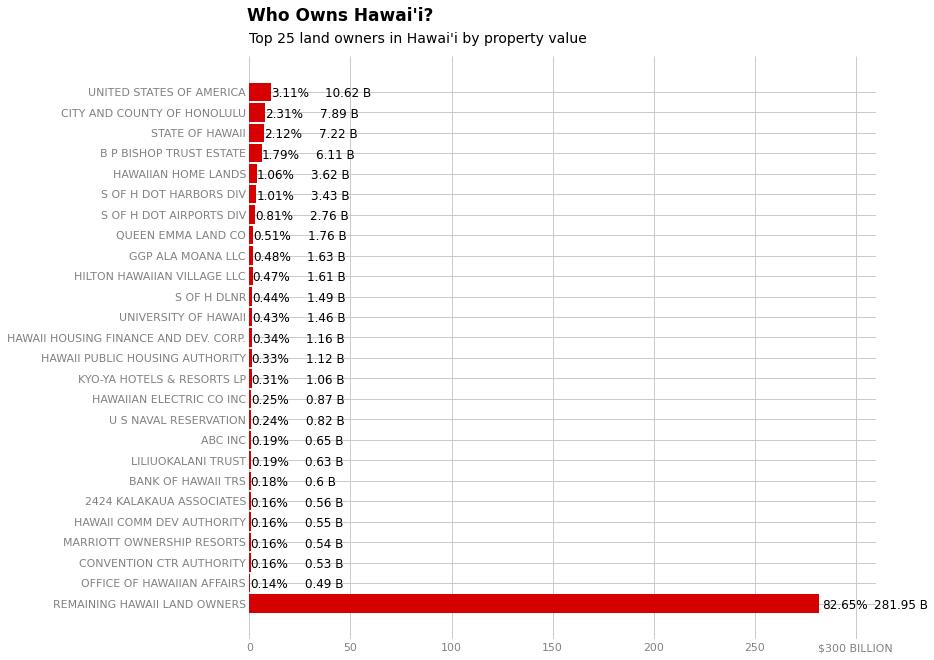

In [26]:
plt.style.use('fivethirtyeight')

x = top_25_owners_value['TAXBILLOWNER']
h = top_25_owners_value['net_value']
p = top_25_owners_value['value%'].round(decimals=2)

fig, ax = plt.subplots()

# figure styles
fig.set_facecolor('white')
fig.set_figheight(10)
fig.set_figwidth(10)

# axes styles
ax.barh(y=x, width=h, height=.9, color='#D60000')
ax.set_facecolor('white')

# title and subtitle
ax.set_title(x=.145, y=1.05, label="Who Owns Hawai'i?", fontsize=17, fontweight='bold')
# x and y position is relative to the axis labels
ax.text(x=-1, y=27.4, s="Top 25 land owners in Hawai'i by property value")

# tick marks (positions)
ax.set_xticks([0,50000000000,100000000000,150000000000,200000000000,250000000000, 300000000000])
ax.set_yticks(x)
#ax.tick_params()

# tick labels (numbers)
ax.set_yticklabels(x, fontsize=11, color='grey')
ax.set_xticklabels(['0', '50', '100', '150', '200', '250','$300 BILLION'],fontsize=11, color='grey')

# axis labels
#ax.set_xlabel('ACRES', fontsize=11, fontweight='bold')
#ax.set_ylabel('OWNERS', fontsize=11, fontweight='bold')


# control the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#set limits
ax.set_xlim(right=310000000000)

x=34

for val in p:
  x = x-1
  ax.annotate(text=str(val)+'%', xy=(val*3430000000, 32.75-x), fontsize=12)
    
x=34

for val in h:
  x = x-1
  ax.annotate(text=str(round(val/1000000000,2))+' B', xy=(val+27000000000, 32.75-x), fontsize=12)

plt.show()

__When looking at property value the top 25 changes quite a bit Dole, Monsanto, Fish and Wildlife all these organizations fall off the top 25 because their lands don't hold a lot of value as they are zoned as ag or preservation lands. Those owning residential, Idustrial, and Business zoned lands move to the top.__

In [27]:
hon_parcel.head()

,PARID,TAXBILLOWNER,TAXBILLCITY,TAXBILLSTATE,TAXBILLCOUNTRY,TAXBILLZIP5,TAXBILLZIP4,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TNETTAXVAL,UNITNO,TOTACRES,TOTSQFT,tot_area_acres,net_value
0,360140040000,"YOUNG,ROYDEN S H",HONOLULU,HI,NaN,96821.0,NaN,35100,35100,862900,64900,798000,0,0.0,7506,0.172314,898000
1,360140050000,"CHIN,YVONNE L P TR",HONOLULU,HI,NaN,96821.0,NaN,81200,81200,863000,58800,804200,0,0.0,7508,0.172360,944200
2,360140060000,HAWAIIAN ELECTRIC CO INC,HONOLULU,HI,NaN,96840.0,NaN,0,0,100,100,0,0,0.0,36,0.000826,100
3,330610860000,SVW TRUST,BEVERLY HILLS,CA,NaN,90210.0,NaN,245500,0,1030900,0,1276400,0,0.0,6693,0.153650,1276400
4,230100281031,KC RAINBOW DEV CO LLC,CUPERTINO,CA,NaN,95014.0,NaN,25000,0,1000,0,26000,PA-3001,0.0,0,0.000000,26000


In [28]:
from numpy import inf

hon_parcel['value/sf'] = hon_parcel['net_value']/(hon_parcel['tot_area_acres']*43560)

hon_parcel['value/sf'][hon_parcel['value/sf'] == inf] = 0

hon_parcel.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PARID,TAXBILLOWNER,TAXBILLCITY,TAXBILLSTATE,TAXBILLCOUNTRY,TAXBILLZIP5,TAXBILLZIP4,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TNETTAXVAL,UNITNO,TOTACRES,TOTSQFT,tot_area_acres,net_value,value/sf
0,360140040000,"YOUNG,ROYDEN S H",HONOLULU,HI,NaN,96821.0,NaN,35100,35100,862900,64900,798000,0,0.0,7506,0.172314,898000,119.637623
1,360140050000,"CHIN,YVONNE L P TR",HONOLULU,HI,NaN,96821.0,NaN,81200,81200,863000,58800,804200,0,0.0,7508,0.172360,944200,125.759190
2,360140060000,HAWAIIAN ELECTRIC CO INC,HONOLULU,HI,NaN,96840.0,NaN,0,0,100,100,0,0,0.0,36,0.000826,100,2.777778
3,330610860000,SVW TRUST,BEVERLY HILLS,CA,NaN,90210.0,NaN,245500,0,1030900,0,1276400,0,0.0,6693,0.153650,1276400,190.706709
4,230100281031,KC RAINBOW DEV CO LLC,CUPERTINO,CA,NaN,95014.0,NaN,25000,0,1000,0,26000,PA-3001,0.0,0,0.000000,26000,0.000000


In [29]:
hon_parcel['land_value/sf'] = hon_parcel['LANDVALUE']/(hon_parcel['tot_area_acres']*43560)

hon_parcel['land_value/sf'][hon_parcel['land_value/sf'] == inf] = 0

hon_parcel

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PARID,TAXBILLOWNER,TAXBILLCITY,TAXBILLSTATE,TAXBILLCOUNTRY,TAXBILLZIP5,TAXBILLZIP4,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TNETTAXVAL,UNITNO,TOTACRES,TOTSQFT,tot_area_acres,net_value,value/sf,land_value/sf
0,360140040000,"YOUNG,ROYDEN S H",HONOLULU,HI,NaN,96821.0,NaN,35100,35100,862900,64900,798000,0,0.0,7506,0.172314,898000,119.637623,114.961364
1,360140050000,"CHIN,YVONNE L P TR",HONOLULU,HI,NaN,96821.0,NaN,81200,81200,863000,58800,804200,0,0.0,7508,0.172360,944200,125.759190,114.944060
2,360140060000,HAWAIIAN ELECTRIC CO INC,HONOLULU,HI,NaN,96840.0,NaN,0,0,100,100,0,0,0.0,36,0.000826,100,2.777778,2.777778
3,330610860000,SVW TRUST,BEVERLY HILLS,CA,NaN,90210.0,NaN,245500,0,1030900,0,1276400,0,0.0,6693,0.153650,1276400,190.706709,154.026595
4,230100281031,KC RAINBOW DEV CO LLC,CUPERTINO,CA,NaN,95014.0,NaN,25000,0,1000,0,26000,PA-3001,0.0,0,0.000000,26000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311133,940980310000,"OUCHI,DENNIS K GEN TRSF TRUST",NaN,NaN,NaN,NaN,NaN,256900,140000,572600,0,689500,0,0.0,7021,0.161180,829500,118.145563,81.555334
311134,940070830021,"TANIMOTO,DAVID J",WAIPAHU,HI,NaN,96797.0,NaN,189500,140000,310100,0,359600,LL/201,0.0,0,0.000000,499600,0.000000,0.000000
311135,670170240000,"SATO,LYDIA L TRUST",WAIALUA,HI,NaN,96791.0,NaN,192900,140000,569200,0,622100,0,0.0,7766,0.178283,762100,98.132887,73.293845
311136,670170250000,"TAKARA,2004 TRUST",NaN,NaN,NaN,NaN,NaN,212300,140000,567800,0,640100,0,0.0,7713,0.177066,780100,101.140931,73.615973


In [30]:
land_value_sf = hon_parcel['land_value/sf']

land_value_sf

0         114.961364
1         114.944060
2           2.777778
3         154.026595
4           0.000000
             ...    
311133     81.555334
311134      0.000000
311135     73.293845
311136     73.615973
311137     72.904957
Name: land_value/sf, Length: 311138, dtype: float64

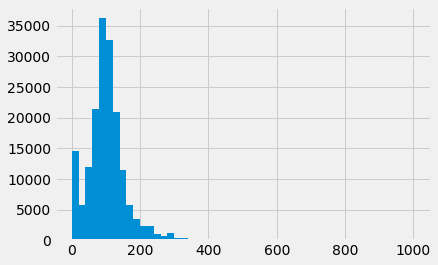

In [31]:
fig, ax = plt.subplots()

ax.hist(land_value_sf, bins=50, range=(.00001,1000))

plt.show()

In [32]:


dole_mean_valsf = hon_parcel['land_value/sf'][hon_parcel['TAXBILLOWNER'] == 'DOLE FOOD CO INC'].mean()
bishop_mean_valsf = hon_parcel['land_value/sf'][hon_parcel['TAXBILLOWNER'] == 'B P BISHOP TRUST ESTATE'].mean()
HHL_mean_valsf = hon_parcel['land_value/sf'][hon_parcel['TAXBILLOWNER'] == 'HAWAIIAN HOME LANDS'].mean()

print(dole_mean_valsf)
print(bishop_mean_valsf)
print(HHL_mean_valsf)

0.6970279598214439
57.84393637007378
50.8394615340594


__I know from experience that Dole lands are all agricultural, Bishop Estates has a mixture of mostly business and industrial, and Hawaiian Homes is mostly residentatial. Looking at the mean values of each you can see that aggricultural land is worth about 3 quarters per SF, while idustrial and residential are around 75$ per FS__

__Also, looking at the histogram, the average value of a parcel of land is about 150$/sqft__

In [33]:
# lets see who's land is worth the most.

valsf_by_owner = hon_parcel.groupby(['TAXBILLOWNER'])['land_value/sf'].mean()

valsf_by_owner = pd.DataFrame(valsf_by_owner).sort_values('land_value/sf', ascending=False)

valsf_by_owner.head()

,land_value/sf
TAXBILLOWNER,
"ATVIC CO.,LTD.",93100.000000
TRUMP INTL HTL & TWR AT WAIKIKI BCH WALK,5850.000000
"JAMES,FRANK L ESTATE",4327.777778
KYO-YA HOTELS & RESORTS LP,2826.648571
BEA INVESTMENTS LLC,2700.000000


In [34]:
hon_parcel['owner_country'] = ['HAWAII' if x == 'HI' else 'US MAINLAND' if pd.isnull(x) == False else x for x in hon_parcel['TAXBILLSTATE']]

hon_parcel['owner_country'] = np.where(pd.isnull(hon_parcel['TAXBILLCOUNTRY']) == False,
                                       hon_parcel['TAXBILLCOUNTRY'],hon_parcel['owner_country'])

hon_parcel.head()

,PARID,TAXBILLOWNER,TAXBILLCITY,TAXBILLSTATE,TAXBILLCOUNTRY,TAXBILLZIP5,TAXBILLZIP4,BUILDINGVALUE,BUILDINGEXEMPTION,LANDVALUE,LANDEXEMPTION,TNETTAXVAL,UNITNO,TOTACRES,TOTSQFT,tot_area_acres,net_value,value/sf,land_value/sf,owner_country
0,360140040000,"YOUNG,ROYDEN S H",HONOLULU,HI,NaN,96821.0,NaN,35100,35100,862900,64900,798000,0,0.0,7506,0.172314,898000,119.637623,114.961364,HAWAII
1,360140050000,"CHIN,YVONNE L P TR",HONOLULU,HI,NaN,96821.0,NaN,81200,81200,863000,58800,804200,0,0.0,7508,0.172360,944200,125.759190,114.944060,HAWAII
2,360140060000,HAWAIIAN ELECTRIC CO INC,HONOLULU,HI,NaN,96840.0,NaN,0,0,100,100,0,0,0.0,36,0.000826,100,2.777778,2.777778,HAWAII
3,330610860000,SVW TRUST,BEVERLY HILLS,CA,NaN,90210.0,NaN,245500,0,1030900,0,1276400,0,0.0,6693,0.153650,1276400,190.706709,154.026595,US MAINLAND
4,230100281031,KC RAINBOW DEV CO LLC,CUPERTINO,CA,NaN,95014.0,NaN,25000,0,1000,0,26000,PA-3001,0.0,0,0.000000,26000,0.000000,0.000000,US MAINLAND


In [35]:
hon_parcel['owner_country'].unique()

array(['HAWAII', 'US MAINLAND', nan, 'CANADA', 'JAPAN', 'CHINA', 'KOREA',
       'SOUTH KOREA', 'NEW ZEALAND', 'HONG KONG', 'GERMANY', 'AUSTRALIA',
       'NZ', 'HONG KONG SAR', 'TAIWAN', 'FRENCH POLYNESIA', 'SINGAPORE',
       'PHILIPPINES', 'TAIPEI, TAIWAN', 'UNITED KINGDOM', 'SWITZERLAND',
       'FINLAND', 'ENGLAND', 'ISRAEL', 'INDONESIA', 'AUSTRIA', 'HONGKONG',
       'S KOREA', 'THAILAND', 'TAIWAN R O C', 'TAIWAN(R.O.C.)', 'SWEDEN',
       'GUAM', 'REPUBLIC OF KOREA', 'SEOUL, KOREA', 'EGYPT',
       'PHILLIPINES', 'FRENCH REPUBLIC', '106-0031', 'UAE', 'SAIPAN',
       'EUROPE', 'MACAU SAR', 'REP OF SINGAPORE', 'JAPAN  162-0843',
       'ARGENTINA', 'P R CHINA', 'MALAYSIA', 'SEOUL KOREA', 'BELGIUM',
       'SPAIN', 'CYPRUS', 'BRAZIL', 'FUKUOKA  JAPAN', 'FRANCE',
       'AMERICAN SAMOA', 'OTTAWA', 'CHANNEL ISLANDS', 'SHANGHAI, CHINA',
       'WESTERN AUSTRALIA', 'IRELAND', 'CANDA', 'REPUBLIC OF SINGAPORE',
       'QATAR', 'TOKYO, JAPAN', 'VIETNAM', 'NORWAY', 'UK',
       'JAPAN 221

In [36]:
#clean data in the owner_state/coutry column so the values are constistent

hon_parcel['owner_country'] = hon_parcel['owner_country'].replace({'HONG KONG SAR':'HONG KONG', 'TAIPEI, TAIWAN': 'TAIWAN', 
                                                                  'S KOREA': 'SOUTH KOREA', 'TAIWAN R O C': 'TAIWAN',
                                                                   'TAIWAN(R.O.C.)': 'TAIWAN', 'REPUBLIC OF KOREA': 'SOUTH KOREA',
                                                                   'SEOUL, KOREA': 'SOUTH KOREA', 'FRENCH REPUBLIC': 'FRANCE',
                                                                   '106-0031': 'JAPAN', 'MACAU SAR':'CHINA',
                                                                   'REP OF SINGAPORE': 'SINGAPORE', 'JAPAN  162-0843':'JAPAN',
                                                                   'P R CHINA':'CHINA', 'WESTERN AUSTRALIA': 'AUSTRALIA',
                                                                   'CANDA':'CANADA', 'REPUBLIC OF SINGAPORE':'SINGAPORE',
                                                                   'TOKYO, JAPAN':'JAPAN', 'JAPAN 221-0052':'JAPAN',
                                                                   'TOKYO,JAPAN':'JAPAN', 'TOKYO 106-0046 JAPAN':'JAPAN',
                                                                   'SEOUL KOREA': 'SOUTH KOREA', 'FUKUOKA  JAPAN':'JAPAN',
                                                                   'OTTAWA':'CANADA', 'FM': 'FEDERATED STATES OF MICRONESIA',
                                                                   'SHANGHAI, CHINA': 'CHINA', 'UK': 'UNITED KINGDOM',
                                                                   'United Arab Emirates':'UAE', 'PW': 'PALAU', 'RL': 'LEBANON',
                                                                   'SLOVENIA, REPUBLIC': 'SLOVENIA', 'TAIWAN R.O.C.': 'TAIWAN',
                                                                   'SAIPAN MP':'SAIPAN', 'VV': 'VIETNAM', 'KOREA':'SOUTH KOREA',
                                                                  '96': 'HI', 'HONGKONG':'HONG KONG', 'PHILLIPINES': 'PHILIPPINES',
                                                                  'NZ': 'NEW ZEALAND'})

In [37]:
hon_parcel['owner_country'].unique()

array(['HAWAII', 'US MAINLAND', nan, 'CANADA', 'JAPAN', 'CHINA',
       'SOUTH KOREA', 'NEW ZEALAND', 'HONG KONG', 'GERMANY', 'AUSTRALIA',
       'TAIWAN', 'FRENCH POLYNESIA', 'SINGAPORE', 'PHILIPPINES',
       'UNITED KINGDOM', 'SWITZERLAND', 'FINLAND', 'ENGLAND', 'ISRAEL',
       'INDONESIA', 'AUSTRIA', 'THAILAND', 'SWEDEN', 'GUAM', 'EGYPT',
       'FRANCE', 'UAE', 'SAIPAN', 'EUROPE', 'ARGENTINA', 'MALAYSIA',
       'BELGIUM', 'SPAIN', 'CYPRUS', 'BRAZIL', 'AMERICAN SAMOA',
       'CHANNEL ISLANDS', 'IRELAND', 'QATAR', 'VIETNAM', 'NORWAY',
       'FIJI ISLANDS', 'DENMARK', 'SLOVENIA', 'JAMAICA'], dtype=object)

In [38]:
hon_parcel['owner_country'].value_counts()

HAWAII              249569
US MAINLAND          21996
JAPAN                 2100
CANADA                 503
SOUTH KOREA            106
CHINA                   99
HONG KONG               66
AUSTRALIA               57
SINGAPORE               57
TAIWAN                  56
GERMANY                 32
NEW ZEALAND             27
PHILIPPINES             18
THAILAND                13
FRENCH POLYNESIA        12
UNITED KINGDOM           9
SWEDEN                   7
FRANCE                   6
MALAYSIA                 6
SWITZERLAND              5
SAIPAN                   4
NORWAY                   4
INDONESIA                3
ENGLAND                  3
IRELAND                  2
CHANNEL ISLANDS          2
FINLAND                  2
AUSTRIA                  2
VIETNAM                  2
AMERICAN SAMOA           2
SPAIN                    2
SLOVENIA                 2
GUAM                     1
FIJI ISLANDS             1
CYPRUS                   1
ARGENTINA                1
EUROPE                   1
D

In [39]:
mean_value_country = hon_parcel.groupby(['owner_country'])['net_value'].mean()


mean_value_country = pd.DataFrame(mean_value_country)

mean_value_country.head()

,net_value
owner_country,
AMERICAN SAMOA,7.970000e+05
ARGENTINA,3.526000e+05
AUSTRALIA,1.213354e+06
AUSTRIA,1.007600e+06
BELGIUM,2.866200e+06


<AxesSubplot:xlabel='owner_country'>

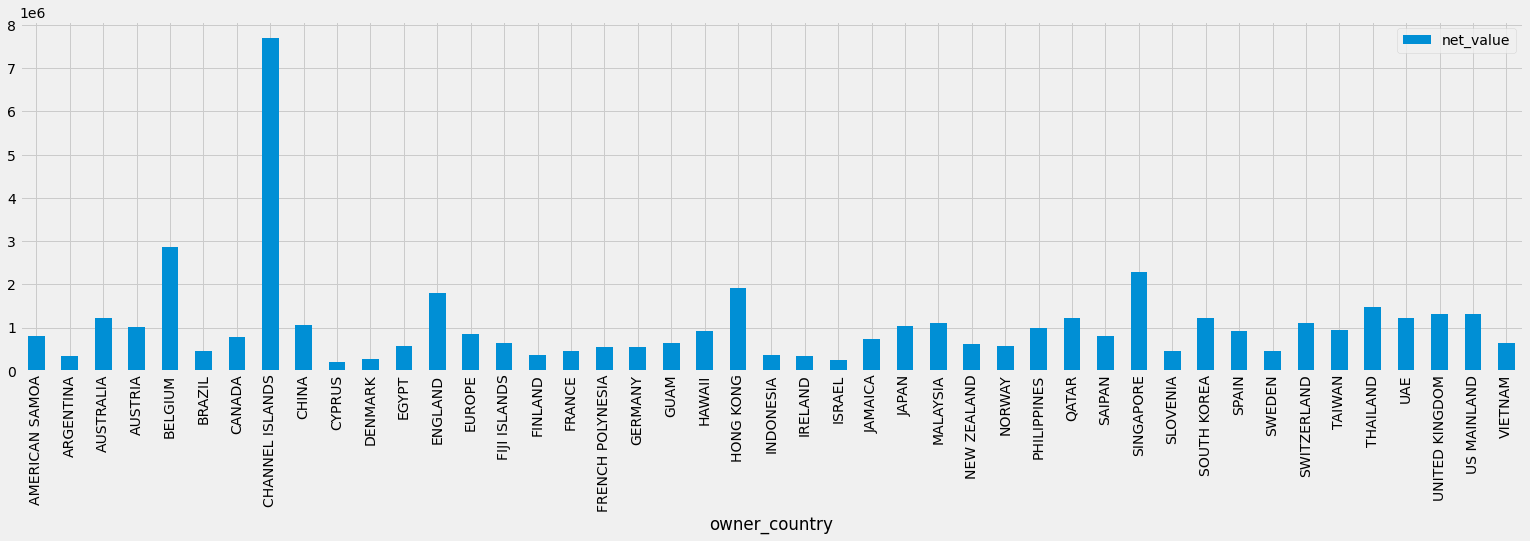

In [40]:
mean_value_country.plot(kind='bar', figsize=(24,6))

__Now I want to isolate the residential properties, I want to get rid of properties with value/sf < 10 and > .00001 because these are typically residential. I don't want to get rid of properties with 0 value/sf, because these include owners of condos and apartments.__

__I also want to get rid of properties with net value over 40 million dollars because these are typically hotels, stores or other  business.(I chose 40 million dollars because after a quick zillow search that was the highest priced lot for sale)__

In [46]:
df_0_500k = hon_parcel[(hon_parcel['net_value'] > 0) & (hon_parcel['net_value'] < 500000)]
df_500k_750k = hon_parcel[(hon_parcel['net_value'] > 500000) & (hon_parcel['net_value'] < 750000)]
df_750k_1m = hon_parcel[(hon_parcel['net_value'] > 750000) & (hon_parcel['net_value'] < 1000000)]
df_1m_1p5m = hon_parcel[(hon_parcel['net_value'] > 1000000) & (hon_parcel['net_value'] < 1500000)]
df_1p5m_2m = hon_parcel[(hon_parcel['net_value'] > 1500000) & (hon_parcel['net_value'] < 2000000)]
df_2m_2p5m = hon_parcel[(hon_parcel['net_value'] > 2000000) & (hon_parcel['net_value'] < 2500000)]
df_2p5m_3m = hon_parcel[(hon_parcel['net_value'] > 2500000) & (hon_parcel['net_value'] < 3000000)]
df_3m_4m = hon_parcel[(hon_parcel['net_value'] > 3000000) & (hon_parcel['net_value'] < 4000000)]
df_4m_6m = hon_parcel[(hon_parcel['net_value'] > 4000000) & (hon_parcel['net_value'] < 6000000)]
df_6m_8m = hon_parcel[(hon_parcel['net_value'] > 6000000) & (hon_parcel['net_value'] < 8000000)]
df_8m_10m = hon_parcel[(hon_parcel['net_value'] > 8000000) & (hon_parcel['net_value'] < 10000000)]
df_10m_15m = hon_parcel[(hon_parcel['net_value'] > 10000000) & (hon_parcel['net_value'] < 15000000)]
df_15m_20m = hon_parcel[(hon_parcel['net_value'] > 15000000) & (hon_parcel['net_value'] < 20000000)]
df_20m_50m = hon_parcel[(hon_parcel['net_value'] > 20000000) & (hon_parcel['net_value'] < 50000000)]
df_50m_100m = hon_parcel[(hon_parcel['net_value'] > 50000000) & (hon_parcel['net_value'] < 100000000)]             
df_100m = hon_parcel[(hon_parcel['net_value'] > 10000000)]  
df_all = hon_parcel

In [47]:
vc_0_500k = pd.DataFrame(df_0_500k['owner_country'].value_counts(normalize=True))
vc_500k_750k = pd.DataFrame(df_500k_750k['owner_country'].value_counts(normalize=True))
vc_750k_1m = pd.DataFrame(df_750k_1m['owner_country'].value_counts(normalize=True))
vc_1m_1p5m = pd.DataFrame(df_1m_1p5m['owner_country'].value_counts(normalize=True))
vc_1p5m_2m = pd.DataFrame(df_1p5m_2m['owner_country'].value_counts(normalize=True))
vc_2m_2p5m = pd.DataFrame(df_2m_2p5m['owner_country'].value_counts(normalize=True))
vc_2p5m_3m = pd.DataFrame(df_2p5m_3m['owner_country'].value_counts(normalize=True))
vc_3m_4m = pd.DataFrame(df_3m_4m['owner_country'].value_counts(normalize=True))
vc_4m_6m = pd.DataFrame(df_4m_6m['owner_country'].value_counts(normalize=True))
vc_6m_8m = pd.DataFrame(df_6m_8m['owner_country'].value_counts(normalize=True))
vc_8m_10m  = pd.DataFrame(df_8m_10m ['owner_country'].value_counts(normalize=True))
vc_10m_15m = pd.DataFrame(df_10m_15m['owner_country'].value_counts(normalize=True))
vc_15m_20m = pd.DataFrame(df_15m_20m['owner_country'].value_counts(normalize=True))
vc_20m_50m = pd.DataFrame(df_20m_50m['owner_country'].value_counts(normalize=True))
vc_50m_100m = pd.DataFrame(df_50m_100m['owner_country'].value_counts(normalize=True))
vc_100m = pd.DataFrame(df_100m['owner_country'].value_counts(normalize=True))
vc_all = pd.DataFrame(df_all['owner_country'].value_counts(normalize=True))

frames= [vc_all, vc_0_500k, vc_500k_750k, vc_750k_1m, vc_1m_1p5m, vc_1p5m_2m, vc_2m_2p5m, vc_2p5m_3m, 
         vc_3m_4m, vc_4m_6m, vc_6m_8m, vc_8m_10m, vc_10m_15m, vc_15m_20m, vc_20m_50m, vc_50m_100m, vc_100m]


In [197]:
owner_country_binned = pd.concat(frames,axis=1,join='outer').reset_index()
owner_country_binned.columns=['country', 'All','0-500k', '500k-750k', '750k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', '3M-4M', 
                              '4M-6M', '6M-8M','8M-10M', '10M-15M', '15M-20M', '20M-50M', '50M-100M', '100M>']
owner_country_binned = owner_country_binned.replace(np.nan,0)

owner_country_binned_other = owner_country_binned.iloc[4:45,:].sum()




owner_country_binned_other = pd.DataFrame(owner_country_binned_other)

owner_country_binned_other.iloc[0,0] = 'OTHER'

owner_country_binned_other = owner_country_binned_other.transpose()

owner_country_binned_other

owner_country_binned = pd.concat([owner_country_binned, owner_country_binned_other])

owner_country_binned = owner_country_binned.drop(owner_country_binned.index[4:45])

owner_country_binned

,country,All,0-500k,500k-750k,750k-1M,1M-1.5M,1.5M-2M,2M-2.5M,2.5M-3M,3M-4M,4M-6M,6M-8M,8M-10M,10M-15M,15M-20M,20M-50M,50M-100M,100M>
0,HAWAII,0.908227,0.872931,0.921837,0.943184,0.933739,0.89888,0.864479,0.851946,0.781075,0.748455,0.727419,0.743295,0.795918,0.751269,0.790698,0.745614,0.77628
1,US MAINLAND,0.0800475,0.114482,0.0679867,0.049436,0.0552263,0.0778275,0.101569,0.119974,0.166853,0.21199,0.246774,0.229885,0.188776,0.233503,0.209302,0.254386,0.215633
2,JAPAN,0.00764228,0.00723666,0.00713466,0.00546246,0.00723787,0.0165733,0.0245364,0.0121251,0.0341545,0.0234858,0.0129032,0.0114943,0.00510204,0.0152284,0,0,0.00449236
3,CANADA,0.00183051,0.00304889,0.00135503,0.000789558,0.00117445,0.00246361,0.00228245,0.00255265,0.00615901,0.00556242,0.0016129,0.00383142,0,0,0,0,0
0,OTHER,0.00225265,0.0023015,0.00168688,0.00112794,0.00262202,0.00425532,0.00713267,0.0134014,0.0117581,0.0105068,0.0112903,0.0114943,0.0102041,0,0,0,0.00359389


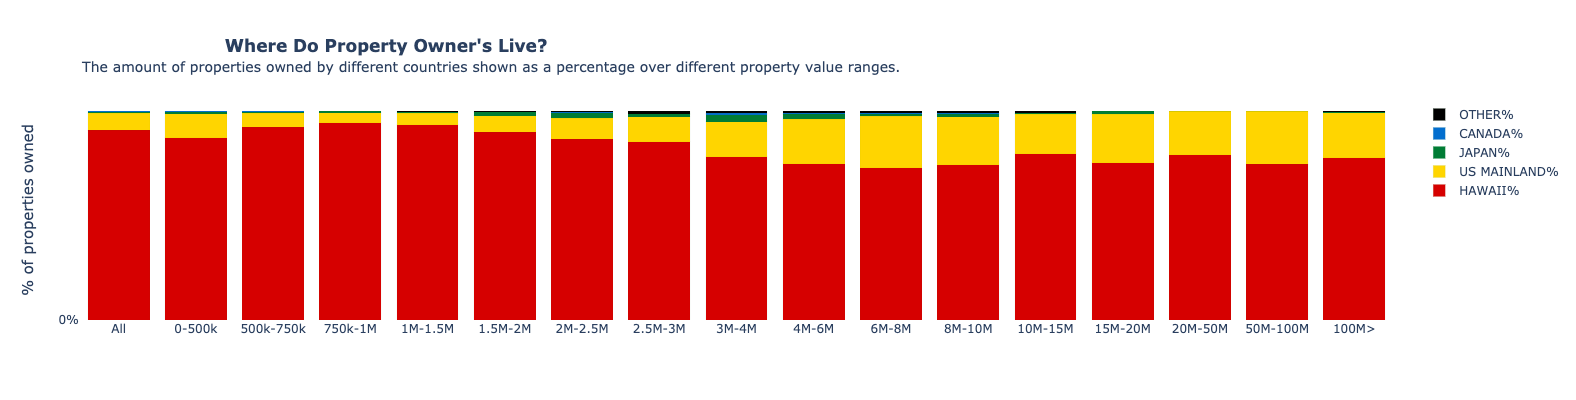

In [200]:
import plotly.graph_objs as go

fig = go.Figure()

fig.layout=go.Layout(
        annotations=[
            go.layout.Annotation(
                text="The amount of properties owned by different countries shown as a percentage over different property value ranges.",
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.0,
                y=1.2,
                font=dict(
                size=14))])


fig.add_trace(go.Bar(y=owner_country_binned.iloc[0,1:18], 
                     x=['All','0-500k', '500k-750k', '750k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', '3M-4M', 
                              '4M-6M', '6M-8M','8M-10M', '10M-15M', '15M-20M', '20M-50M', '50M-100M', '100M>'], 
                     name="HAWAII%", marker=dict(color='#D60000', line=dict(color='rgba(0,128,0, 0.5)', width=0.05))))

fig.add_trace(go.Bar(y=owner_country_binned.iloc[1,1:18], 
                     x=['All','0-500k', '500k-750k', '750k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', '3M-4M', 
                              '4M-6M', '6M-8M','8M-10M', '10M-15M', '15M-20M', '20M-50M', '50M-100M', '100M>'], 
                     name="US MAINLAND%", marker=dict(color='#FFD500', line=dict(color='rgba(0,128,0, 0.5)', width=0.05))))

fig.add_trace(go.Bar(y=owner_country_binned.iloc[2,1:18], 
                     x=['All','0-500k', '500k-750k', '750k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', '3M-4M', 
                              '4M-6M', '6M-8M','8M-10M', '10M-15M', '15M-20M', '20M-50M', '50M-100M', '100M>'], 
                     name="JAPAN%", marker=dict(color='#007C35', line=dict(color='rgba(0,128,0, 0.5)', width=0.05))))

fig.add_trace(go.Bar(y=owner_country_binned.iloc[3,1:18], 
                     x=['All','0-500k', '500k-750k', '750k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', '3M-4M', 
                              '4M-6M', '6M-8M','8M-10M', '10M-15M', '15M-20M', '20M-50M', '50M-100M', '100M>'], 
                     name="CANADA%", marker=dict(color='#026ECE', line=dict(color='rgba(0,128,0, 0.5)', width=0.05))))

fig.add_trace(go.Bar(y=owner_country_binned.iloc[4,1:18], 
                     x=['All','0-500k', '500k-750k', '750k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', '3M-4M', 
                              '4M-6M', '6M-8M','8M-10M', '10M-15M', '15M-20M', '20M-50M', '50M-100M', '100M>'], 
                     name="OTHER%", marker=dict(color='#000000', line=dict(color='rgba(0,128,0, 0.5)', width=0.05))))


fig.update_layout(
        yaxis=dict(
        title_text="% of properties owned",
        ticktext=["0%", "20%", "40%", "60%","80%","100%"],
        tickvals=[0, 20, 40, 60, 80, 100],
        tickmode="array",
        titlefont=dict(size=15),
    ),
    autosize=False,
    width=1000,
    height=400,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title={
        'text': "<b>Where Do Property Owner's Live?</b>",
        'y':0.9,
        'x':0.245,
        'xanchor': 'center',
        'yanchor': 'top'},
    
    barmode='stack')



fig.show()

In [ ]:
res_df_acres = res_df.groupby(['owner_country'])['tot_area_acres'].sum()

res_df_acres = pd.DataFrame(res_df_acres).sort_values('tot_area_acres', ascending=False)

res_df_acres['area%'] = res_df_acres['tot_area_acres']/res_df_acres['tot_area_acres'].sum()*100

res_df_acres.head(10)

In [ ]:
res_df = res_df.groupby(['owner_country'])['net_value'].sum()

res_df = pd.DataFrame(res_df).sort_values('net_value', ascending=False)

res_df['area%'] = res_df['net_value']/res_df['net_value'].sum()*100

res_df.head(50)

In [ ]:
hon_parcel['owner_country'].value_counts(dropna=False)